<a href="https://colab.research.google.com/github/Dhanush-sai-reddy/Hull-Tactical---Market-Prediction/blob/main/notebook1e850736a0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import zipfile
import os

zip_file_path = '/content/hull-tactical-market-prediction.zip'
extract_dir = '/content/hull-tactical-market-prediction/'

os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"File '{zip_file_path}' unzipped to '{extract_dir}' successfully.")
print(f"Contents of '{extract_dir}':")
for item in os.listdir(extract_dir):
    print(item)

File '/content/hull-tactical-market-prediction.zip' unzipped to '/content/hull-tactical-market-prediction/' successfully.
Contents of '/content/hull-tactical-market-prediction/':
train.csv
test.csv
kaggle_evaluation


In [8]:
import pandas as pd
import numpy as np

In [9]:
train_path ='/content/hull-tactical-market-prediction/train.csv'
df =pd.read_csv(train_path)

In [10]:
df.head()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301


In [12]:
df.describe()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
count,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,...,8042.000000,8042.000000,7536.000000,8042.000000,7537.000000,8042.000000,4509.000000,9048.000000,9048.000000,9048.000000
mean,4523.500000,0.031609,0.031609,0.047856,0.575265,0.190760,-0.238174,0.045756,0.142905,0.143236,...,0.487920,0.505426,0.373707,0.290294,0.144482,0.302430,0.122810,0.000470,0.000107,0.000052
std,2612.076951,0.174967,0.174967,0.213473,0.494330,0.392922,0.425990,0.208967,0.349995,0.350333,...,0.306253,0.306571,1.149195,0.313430,1.322779,0.350292,1.270592,0.010535,0.000088,0.010552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000661,0.000661,-2.723527,0.000661,-2.027551,0.000661,-1.497420,-0.039754,-0.000004,-0.040582
25%,2261.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.205688,0.234954,-0.466911,0.000661,-0.794254,0.000661,-0.731204,-0.004321,0.000008,-0.004751
50%,4523.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.488757,0.516865,0.283280,0.185185,-0.103035,0.098049,-0.181941,0.000661,0.000099,0.000257
75%,6785.250000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.759094,0.770503,1.117657,0.525132,0.788774,0.587302,0.670649,0.005891,0.000193,0.005469
max,9047.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,6.809912,1.000000,12.678264,1.000000,12.997540,0.040661,0.000317,0.040551


In [14]:
df.columns

Index(['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1',
       'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19',
       'E2', 'E20', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'I1', 'I2', 'I3',
       'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'M1', 'M10', 'M11', 'M12', 'M13',
       'M14', 'M15', 'M16', 'M17', 'M18', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7',
       'M8', 'M9', 'P1', 'P10', 'P11', 'P12', 'P13', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'S1', 'S10', 'S11', 'S12', 'S2', 'S3', 'S4',
       'S5', 'S6', 'S7', 'S8', 'S9', 'V1', 'V10', 'V11', 'V12', 'V13', 'V2',
       'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'forward_returns',
       'risk_free_rate', 'market_forward_excess_returns'],
      dtype='object')

In [16]:
df.isna()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9043,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9044,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9045,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9046,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
df.isna().sum()


,0
date_id,0
D1,0
D2,0
D3,0
D4,0
...,...
V8,1006
V9,4539
forward_returns,0
risk_free_rate,0


In [18]:
df.isna().sum().sum()
#total nans

np.int64(137675)

In [19]:
df[df.isna().any(axis=1)]
#rows with atleast one nan

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6964,6964,0,0,0,0,0,0,0,0,0,...,0.998677,0.993386,0.361122,0.830688,-0.562964,0.952381,-0.645116,0.010457,0.000038,0.010111
6965,6965,0,0,0,0,0,-1,0,0,0,...,0.984127,0.992725,0.735807,0.937169,-0.897940,0.972884,-0.917116,-0.003585,0.000039,-0.003932
6966,6966,0,0,0,0,0,-1,0,0,0,...,0.989418,0.993386,1.294909,0.873677,-0.736227,0.974868,-0.777680,-0.002331,0.000039,-0.002678
6967,6967,0,0,0,0,0,-1,0,0,0,...,0.963624,0.995370,0.511534,0.814153,-0.741770,0.953042,-0.766430,0.002336,0.000040,0.001989


In [20]:
df.columns[df.notna().all()]
#fully filled

Index(['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9',
       'forward_returns', 'risk_free_rate', 'market_forward_excess_returns'],
      dtype='object')

In [25]:
dfna=df.columns[df.isna().any()]
dfna.shape

(85,)

#so 85 features has nan values in them

In [26]:
df_afterdrop=df.dropna().copy()

In [27]:
df_afterdrop.shape

(2079, 98)

In [ ]:
#since a loss of lot of data shall fill the missing values

In [28]:
df = df.sort_values('date_id')

In [29]:
df

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9043,9043,0,0,0,1,1,0,0,1,0,...,0.186508,0.000661,1.010037,0.923942,-0.474519,0.080688,-0.439929,0.005458,0.000149,0.004998
9044,9044,0,0,0,1,1,0,0,1,0,...,0.128968,0.000661,0.492390,0.904101,-0.580852,0.070767,-0.496089,-0.004565,0.000147,-0.005024
9045,9045,0,0,0,1,1,0,0,0,1,...,0.062831,0.003307,0.332762,0.932540,-0.469138,0.057540,-0.411743,0.001852,0.000147,0.001395
9046,9046,0,0,0,1,1,0,0,0,1,...,0.011905,0.000661,0.476745,0.919974,-0.551739,0.052910,-0.468078,0.003463,0.000146,0.003006


In [30]:
target_col = 'market_forward_excess_returns'

In [31]:
exclude_cols = ['date_id', 'forward_returns', 'risk_free_rate', target_col]

In [32]:
feature_cols = [c for c in df.columns if c not in exclude_cols]

In [38]:
df[feature_cols]=df[feature_cols].ffill().bfill()
#ffill-->forward fill
#bfill--->backwardfill
df.isna()

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9043,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9044,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9045,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9046,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 7.5 MB/s eta 0:00:00


In [50]:
test_path ='/content/hull-tactical-market-prediction/test.csv'
dftest=pd.read_csv(test_path)
dftest.shape

(10, 99)

In [49]:
df.shape

(9048, 98)

In [52]:
import xgboost as xgb
import optuna
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import log_loss

features = [c for c in df.columns if c in dftest.columns]
target_col = 'market_forward_excess_returns'

print(f"Training with {len(features)} common features.")

X = df[features]
y = df[target_col]

if y.dtype == 'float':
    y = (y > 0).astype(int)

def objective(trial):
    tscv = TimeSeriesSplit(n_splits=7)
    scores = []

    param = {
        'verbosity': 0,
        'objective': 'binary:logistic',
        'booster': 'gbtree',
        'eval_metric': 'logloss',
        'lambda': trial.suggest_float('lambda', 1e-8, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'max_depth': trial.suggest_int('max_depth', 2, 8),
        'min_child_weight': trial.suggest_int('min_child_weight', 10, 100),
        'eta': trial.suggest_float('eta', 0.005, 0.3, log=True),
        'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide'])
    }

    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = xgb.XGBClassifier(**param)
        model.fit(X_train, y_train)

        preds = model.predict_proba(X_test)[:, 1]
        score = log_loss(y_test, preds)
        scores.append(score)

    return np.mean(scores)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Best Params:", study.best_params)

final_model = xgb.XGBClassifier(**study.best_params)
final_model.fit(X, y)

dftest['predicted_prob'] = final_model.predict_proba(dftest[features])[:, 1]
print(dftest[['predicted_prob']].head())

[I 2026-01-05 13:50:42,424] A new study created in memory with name: no-name-618d484d-68d8-47ed-8074-3c46aef07770


Training with 95 common features.


[I 2026-01-05 13:50:53,272] Trial 0 finished with value: 0.7316338240981183 and parameters: {'lambda': 4.6584825932581037e-07, 'alpha': 2.8651674447039835e-08, 'subsample': 0.8498572551259332, 'colsample_bytree': 0.9868572683946262, 'max_depth': 3, 'min_child_weight': 82, 'eta': 0.265720424657998, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.7316338240981183.
[I 2026-01-05 13:51:04,716] Trial 1 finished with value: 0.6948511666850753 and parameters: {'lambda': 4.74611198908473e-06, 'alpha': 0.001814136190879083, 'subsample': 0.8001532500185974, 'colsample_bytree': 0.7542066450847693, 'max_depth': 6, 'min_child_weight': 51, 'eta': 0.018764326878342317, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 0.6948511666850753.
[I 2026-01-05 13:51:11,357] Trial 2 finished with value: 0.724925611969937 and parameters: {'lambda': 4.7578285608808166e-08, 'alpha': 0.0003916819593611401, 'subsample': 0.7949490349794723, 'colsample_bytree': 0.7111676245149634, 'max_depth': 8, 'm

Best Params: {'lambda': 0.0010453322186893409, 'alpha': 5.2287004174585885, 'subsample': 0.9656475454979092, 'colsample_bytree': 0.6209890764414553, 'max_depth': 2, 'min_child_weight': 33, 'eta': 0.014853165702101951, 'grow_policy': 'lossguide'}
   predicted_prob
0        0.517663
1        0.508837
2        0.522108
3        0.518559
4        0.523668


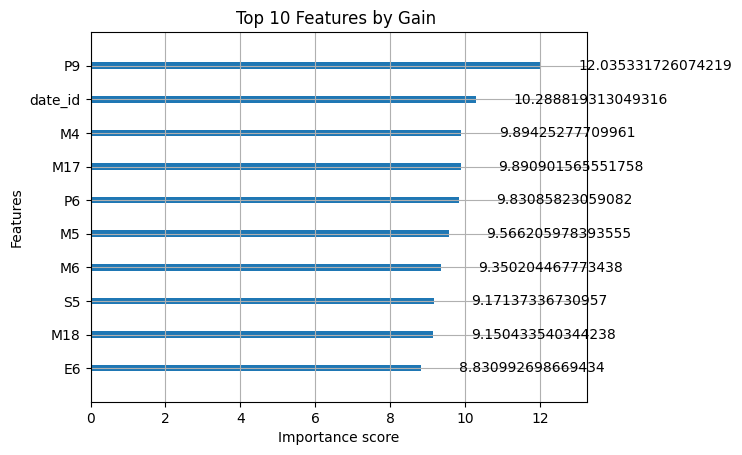

In [54]:
import matplotlib.pyplot as plt

xgb.plot_importance(final_model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Features by Gain ")
plt.show()